In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from ReadKTOutputFile import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.13/02
        _                __     
  _____(_)________ _____/ /___ _
 / ___/ / ___/ __ `/ __  / __ `/
/ /__/ / /__/ /_/ / /_/ / /_/ / 
\___/_/\___/\__,_/\__,_/\__,_/  



2019-05-28T22:09:15[INFO    ] CicadaPy(50) -> All set!


In [3]:
%matplotlib notebook

In [4]:
def bayesian_efficiency(n, k):

    mean = (k+1)/(n+2)
    mode = k/n
    var = ((k+1)*(k+2))/((n+2)*(n+3))-(k+1)**2/(n+2)**2
    mode_errors = [mode - (mean-np.sqrt(var)), mean+np.sqrt(var) - mode]
    
    return mean, mode, np.sqrt(var), mode_errors


def LoadFilelist(mypath, search_str = '.'):
    '''
    Get list of all files fullfilling a few naming conditions
    '''
    filelist = []
    print('Searching files in {} with "{}" in filename'.format(mypath, search_str))
    for (dirpath, dirnames, filenames) in os.walk(mypath):
        for name in filenames:
            if '.root' in name and search_str in name:
                filelist.append(name)
    return filelist

def GetEventIdFromFilename(filename):
    splitted_name = filename.replace('.', '_')
    splitted_name = splitted_name.split('_')
    for s in splitted_name:
        #print(s)
        if s.isdigit():
            break
    return s

# get list of files

def get_path_list(paths, slopes):
    list = []
    for path in paths:
        for slope in slopes:
            list.append(path + str(slope))
    return list

In [5]:
#CHANGE THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
list_of_directories = ['../spring_quarter/SlopeScan_20190427/', '../spring_quarter/SlopeScan_20190502/']
list_of_slopes = [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                  0.7000000000000001, 0.8, 0.9, 1.0, 1.1]
path_list = get_path_list(list_of_directories, list_of_slopes)
TrackAndEventFileList = []
k_index = []
simulated_snr = []
simulated_slope = []
for path in path_list:
    #TrackandEventfile
    TrackAndEventFileList.append(sorted(LoadFilelist(path, 'reconstructed_event')))
#change concatenated files to something else

# check events are in files
    
for each_slope, each_path in zip(TrackAndEventFileList, path_list):
    #print(each_slope)
    #print(len(each_slope))
    k_id = []
    for i in range(len(each_slope)):
        try:
            start_times = ReadKTOutputFile(os.path.join(each_path, each_slope[i]), var='StartTimeInRunC')
            #print(start_times)
        except Exception as e:
            #print(e) # you ll probably get an error when no events are present in the file. if you 're sure that is the error, you can comment this line.
            continue

        file_id = int(GetEventIdFromFilename(each_slope[i]))
        if len(start_times) > 0:
            k_id.append(file_id)
    k_index.append(k_id)


    # load json file with simulated snrs
    snr_and_power_file = each_path + '/snr_and_power_and_slope.json'
    with open(snr_and_power_file) as infile:
        a = json.load(infile)
        #print(a)
        #print(a['snr'])
        #print(a['slope'])
    simulated_snr.append(a['snr'])
    simulated_slope.append(a['slope'])
    #print(simulated_slope)

simulated_snr = np.asarray(simulated_snr)
simulated_slope = np.asarray(np.round(simulated_slope, 1))

# missing!!!!! :k_index is a list with the event ids that katydid reconstructed
sub_event_ids = k_index

#not actually the slope that Katydid reconstructs -- variable name misnomer
#list of simulated slopes from events Katydid reconstructed
reconstructed_slope = []
for each_run, each_slope in zip(sub_event_ids, simulated_slope):
    for i in each_run:
        reconstructed_slope.append(np.round(each_slope[i], 1))

#similar to above, not actually the snr that Katydid reconstructs -- variable name misnomer
reconstructed_snr = []
for each_run, each_snr in zip(sub_event_ids, simulated_snr):
    for i in each_run:
        reconstructed_snr.append(each_snr[i])

reconstructed_slope_arr = np.asarray(reconstructed_slope)
reconstructed_snr_arr = np.asarray(reconstructed_snr)

Searching files in ../spring_quarter/SlopeScan_20190427/0.1 with "reconstructed_event" in filename
Searching files in ../spring_quarter/SlopeScan_20190427/0.2 with "reconstructed_event" in filename
Searching files in ../spring_quarter/SlopeScan_20190427/0.30000000000000004 with "reconstructed_event" in filename
Searching files in ../spring_quarter/SlopeScan_20190427/0.4 with "reconstructed_event" in filename
Searching files in ../spring_quarter/SlopeScan_20190427/0.5 with "reconstructed_event" in filename
Searching files in ../spring_quarter/SlopeScan_20190427/0.6 with "reconstructed_event" in filename
Searching files in ../spring_quarter/SlopeScan_20190427/0.7000000000000001 with "reconstructed_event" in filename
Searching files in ../spring_quarter/SlopeScan_20190427/0.8 with "reconstructed_event" in filename
Searching files in ../spring_quarter/SlopeScan_20190427/0.9 with "reconstructed_event" in filename
Searching files in ../spring_quarter/SlopeScan_20190427/1.0 with "reconstructe

Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


<IPython.core.display.Javascript object>


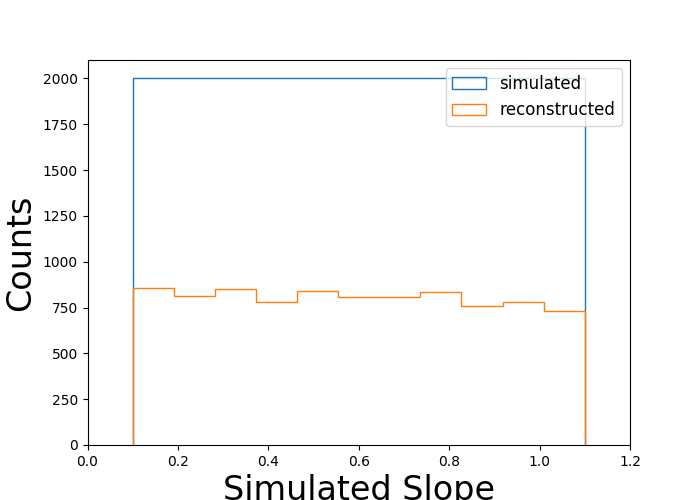

<IPython.core.display.Javascript object>


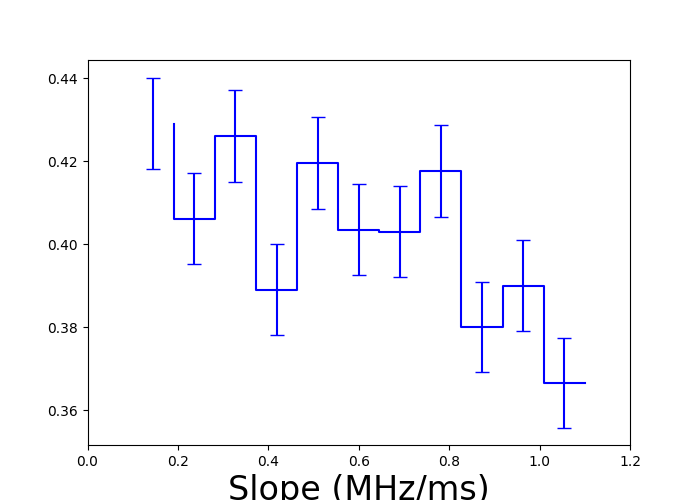

<IPython.core.display.Javascript object>


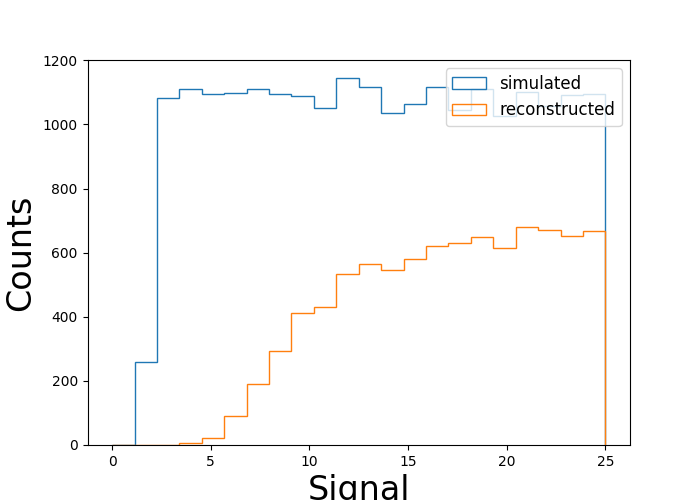

<IPython.core.display.Javascript object>


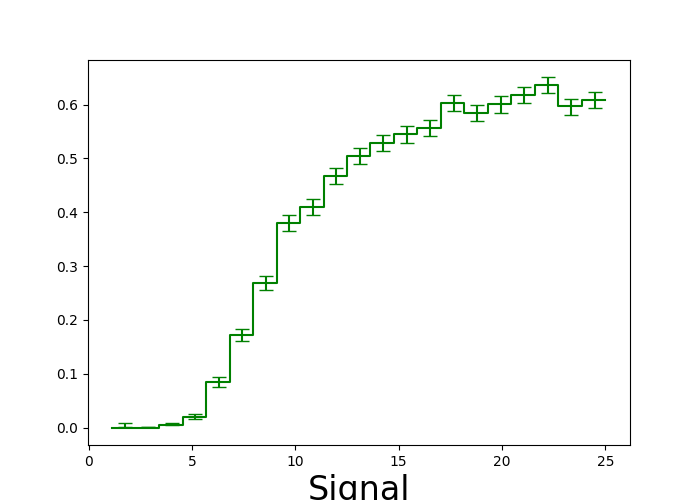

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [68]:
snr_int_reconstructed = [0, 10, 15, 20, np.round(np.max(reconstructed_snr), 1)]
snr_int_simulated = [0, 10, 15, 20, np.round(np.max(simulated_snr.flatten()), 1)]
slope_int_reconstructed = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
slope_int_simulated = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
snr_colors = ['b', 'm', 'g', 'r']
slope_colors = ['b', 'm', 'g', 'r', 'c', 'y', 'k', 'orange', 'purple', 'pink', 'blue']
snr_labels = []
slope_labels = []
snr_slope_maskr = []
snr_slope_masks = []
slope_snr_maskr = []
slope_snr_masks = []
#creating masks for different snr intervals
for i in range(len(snr_int_reconstructed) - 1):
    snr_slope_maskr.append(np.where((reconstructed_snr_arr >= snr_int_reconstructed[i]) 
                                    & (reconstructed_snr_arr < snr_int_reconstructed[i+1]))[0])
    
for i in range(len(snr_int_simulated) - 1):
    snr_slope_masks.append(np.where((simulated_snr.flatten() >= snr_int_simulated[i]) 
                                    & (simulated_snr.flatten() < snr_int_simulated[i+1]))[0])
    snr_labels.append(str(snr_int_simulated[i]) + ' - ' + str(snr_int_simulated[i+1]))
    

#creating masks for different slopes
for i in range(len(slope_int_reconstructed) - 1):
    slope_snr_maskr.append(np.where((reconstructed_slope_arr >= slope_int_reconstructed[i]) 
                                    & (reconstructed_slope_arr < slope_int_reconstructed[i+1]))[0])

for i in range(len(slope_int_simulated) - 1):
    slope_snr_masks.append(np.where((simulated_slope.flatten() >= slope_int_simulated[i]) 
                                    & (simulated_slope.flatten() < slope_int_simulated[i+1]))[0])
    slope_labels.append(str(slope_int_simulated[i]))



######################## simulation vs reconstruction plots
plt.figure(figsize=(7,5))
##total counts per slope
plt.tight_layout()
bins = np.linspace(np.min(simulated_slope), np.max(simulated_slope), 12)
n0, b0, p0 = plt.hist(simulated_slope.flatten(), bins=bins, histtype='step', label='simulated')
n1, b1, p1 = plt.hist(reconstructed_slope, bins=bins, histtype='step', label='reconstructed')
plt.xlim(0, 1.2, 0.1)
plt.xlabel('Simulated Slope', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.legend(fontsize=12, loc=0)
plt.savefig('../spring_quarter/Slopescan_20190502/total_counts_per_slope.png')

plt.figure(figsize=(7,5))
##fraction of reconstructed events per slope
plt.tight_layout()
plt.step(bins[1:], n1/n0, color='b')
mean1, mode1, var1, mode_errors1 = bayesian_efficiency(n0, n1)
plt.errorbar(b0[1:]-((bins[1]-bins[0])/2), mode1, yerr=mode_errors1, linestyle='', capsize=5, color='b')
plt.xlim(0, 1.2, 0.1)
plt.xlabel('Slope (MHz/ms)', fontsize=24)
#plt.ylabel('Fraction of simulated events that were detected', fontsize=24)
plt.savefig('../spring_quarter/Slopescan_20190502/fraction_of_events_per_slope.png')

plt.figure(figsize=(7,5))
##total counts per snr range
plt.tight_layout()
bins2 = np.linspace(0, np.max(simulated_snr), len(simulated_snr)+1)
n2, b2, p2 = plt.hist(simulated_snr.flatten(), bins=bins2, histtype='step', label='simulated')
n3, b3, p3 = plt.hist(reconstructed_snr, bins=bins2, histtype='step', label='reconstructed')
plt.xlabel('Signal', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.legend(fontsize=12, loc=0)
plt.savefig('../spring_quarter/Slopescan_20190502/total_counts_per_snr.png')

plt.figure(figsize=(7,5))
##fraction of reconstructed events per snr
plt.tight_layout()
plt.step(bins2[1:], n3/n2, color='g')
mean2, mode2, var2, mode_errors2 = bayesian_efficiency(n2, n3)
plt.errorbar(b2[1:]-((bins2[1]-bins[0])/2), mode2, yerr=mode_errors2, linestyle='', capsize=5, color='g')
plt.xlabel('Signal', fontsize=24)
#plt.ylabel('Fraction of simulated events that were detected', fontsize=24)
plt.savefig('../spring_quarter/Slopescan_20190502/fraction_of_events_per_snr.png')

In [6]:
len(slope_int_simulated) - 1

11

<IPython.core.display.Javascript object>


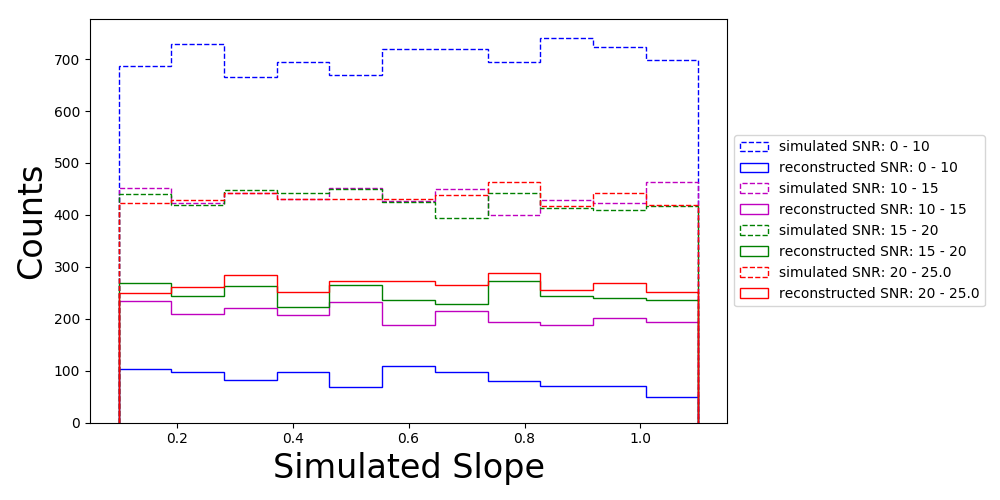

<IPython.core.display.Javascript object>


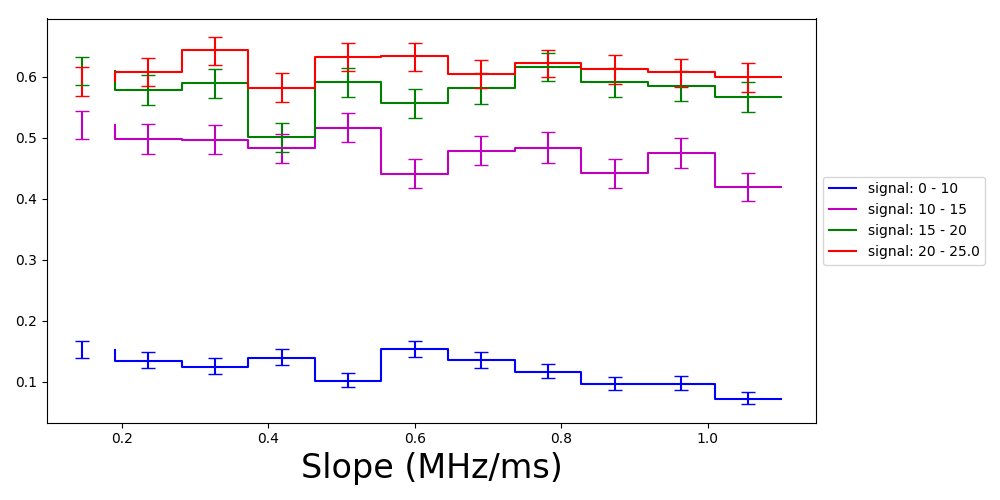

<IPython.core.display.Javascript object>


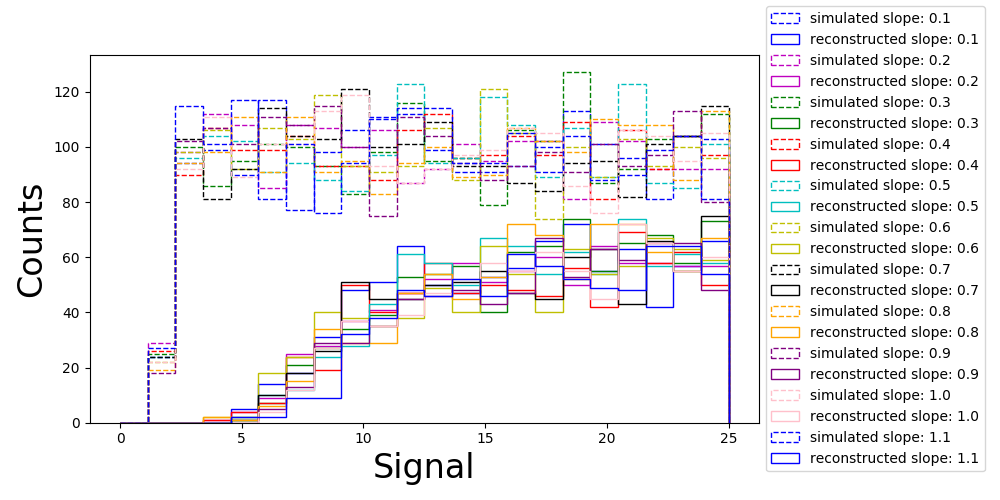

<IPython.core.display.Javascript object>


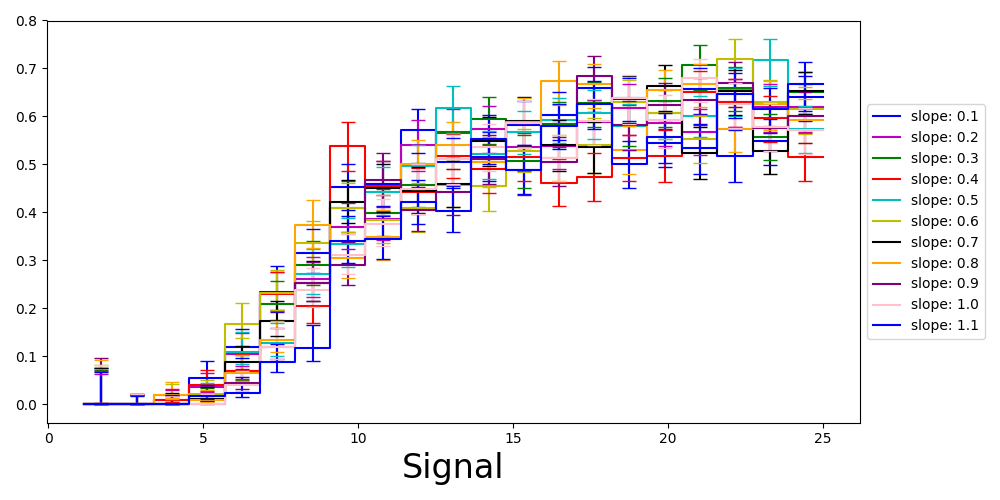

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [59]:
plt.figure(figsize=(10,5))
##counts per slope in each snr interval
sim_slope_list = []
rec_slope_list = []
for each_r, each_s, color, label in zip(snr_slope_maskr, snr_slope_masks, snr_colors, snr_labels):
    n_0, b_0, p_0 = plt.hist([simulated_slope.flatten()[i] for i in each_s], bins=bins, histtype='step', label='simulated SNR: '+label, color=color, linestyle='--')
    sim_slope_list.append([n_0, b_0, p_0])
    n_1, b_1, p_1 = plt.hist([reconstructed_slope[i] for i in each_r], bins=bins, histtype='step', label='reconstructed SNR: '+label, color=color, linestyle='-')
    rec_slope_list.append([n_1, b_1, p_1])
plt.xlabel('Simulated Slope', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../spring_quarter/Slopescan_20190502/counts_per_slope_snrint.png')

plt.figure(figsize=(10,5))
##fraction of reconstructed events per slope in each snr interval
for s, r, color, label in zip(sim_slope_list, rec_slope_list, snr_colors, snr_labels):
    plt.step(bins[1:],(r[0])/(s[0]), color=color, label='signal: '+label)
    mean3, mode3, var3, mode_errors3 = bayesian_efficiency(s[0], r[0])
    plt.errorbar(s[1][1:]-((bins[1]-bins[0])/2), mode3, yerr=mode_errors3, linestyle='', color=color, capsize=5)
plt.xlabel('Slope (MHz/ms)', fontsize=24)
#plt.ylabel('Fraction of simulated events that were detected', fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../spring_quarter/Slopescan_20190502/fraction_per_slope_snrint.png')

plt.figure(figsize=(10,5))
##counts per snr interval in each slope
sim_snr_list = []
rec_snr_list = []
for each_r, each_s, color, label in zip(slope_snr_maskr, slope_snr_masks, slope_colors, slope_labels):
    n_2, b_2, p_2 = plt.hist([simulated_snr.flatten()[i] for i in each_s], bins=bins2, histtype='step', label='simulated slope: '+label, color=color, linestyle='--')
    sim_snr_list.append([n_2, b_2, p_2])
    n_3, b_3, p_3 = plt.hist([reconstructed_snr[i] for i in each_r], bins=bins2, histtype='step', label='reconstructed slope: '+label, color=color, linestyle='-')
    rec_snr_list.append([n_3, b_3, p_3])
plt.xlabel('Signal', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../spring_quarter/Slopescan_20190502/counts_per_snr_slopeint.png')

plt.figure(figsize=(10,5))
##fraction of reconstructed events per snr in each slope interval
for s, r, color, label in zip(sim_snr_list, rec_snr_list, slope_colors, slope_labels):
    plt.step(bins2[1:],(r[0])/(s[0]), color=color, label='slope: '+label)
    mean4, mode4, var4, mode_errors4 = bayesian_efficiency(s[0], r[0])
    plt.errorbar(s[1][1:]-((bins2[1]-bins2[0])/2), mode4, yerr=mode_errors4, linestyle='', color=color, capsize=5)
plt.xlabel('Signal', fontsize=24)
#plt.ylabel('Fraction of simulated events that were detected', fontsize=24)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../spring_quarter/Slopescan_20190502/fraction_per_snr_slopeint.png')

In [8]:
#plot heatmap
from matplotlib import colors
fig, ax = plt.subplots(figsize=(10,10))
plt.xlabel('Slope (MHz/ms)', fontsize=24)
plt.ylabel('Signal-to-Noise-Ratio', fontsize=24)
#hist = ax.hist2d(n02/n01, n04/n03, bins=11, norm=colors.LogNorm())
hist1 = plt.hist2d(reconstructed_slope_arr, reconstructed_snr_arr, bins=11, norm=colors.LogNorm())
plt.colorbar(hist1[3])
plt.grid()
plt.show()
fig,ax = plt.subplots(figsize=(10,10))
plt.xlabel('Slope (MHz/ms)', fontsize=24)
plt.ylabel('Signal-to-Noise-Ratio', fontsize=24)
hist2 = plt.hist2d(simulated_slope.flatten(), simulated_snr.flatten(), bins=11, norm=colors.LogNorm())
plt.colorbar(hist2[3])
plt.grid()
plt.show()
#CHANGE THIS!!!!!!!!!!
#plt.savefig('../spring_quarter/Slopescan_20190502/slope_snr_heatmap.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
#fig, ax = plt.subplots(figsize=(10,10))
fig = plt.subplots(figsize=(10,10))
plt.xticks(np.arange(11), ('0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', '1.1'))
plt.yticks(np.arange(0, 11, step=2.75), ('5', '10', '15', '20', '25'))
plt.imshow(np.transpose(hist1[0]/hist2[0]), origin='lower')
plt.colorbar()
plt.savefig('../spring_quarter/Slopescan_20190502/slope_snr_heatmap_new.png')

<IPython.core.display.Javascript object>

In [ ]:
mean4, mode4, var4, mode_errors4 = bayesian_efficiency(s[0], r[0])
    plt.errorbar(s[1][1:]-((bins2[1]-bins2[0])/2), mode4, yerr=mode_errors4, linestyle='', color=color, capsize=5)

<IPython.core.display.Javascript object>


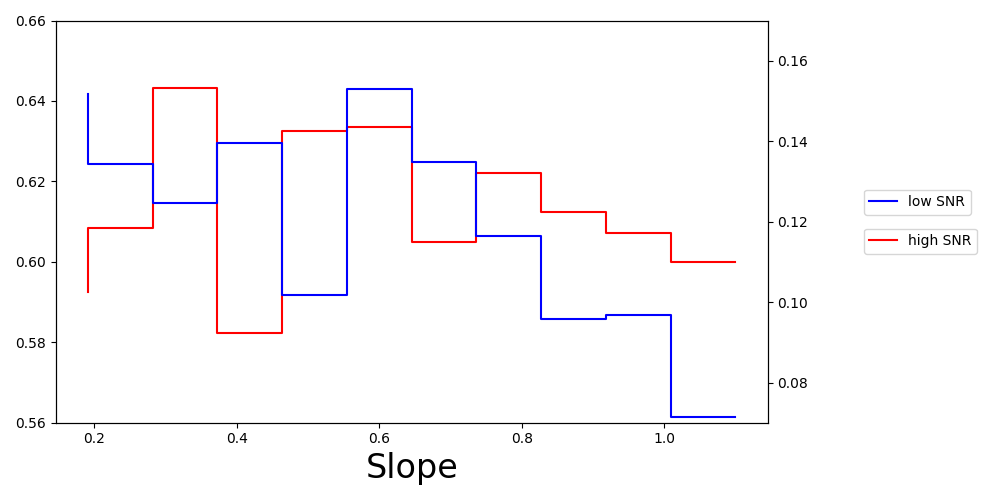

In [84]:
plt.figure(figsize=(10,5))
ax = plt.gca()
ax2 = ax.twinx()

sim = []
mean5 = []
mode5 = []
var5 = []
mod_errors5 = []
fraction_of_slopes = []
for s, r, in zip(sim_slope_list, rec_slope_list):
    sim.append(s[1][1:])
    fraction_of_slopes.append(r[0]/s[0])
    mean, mode, var, mode_errors = bayesian_efficiency(s[0], r[0])
    mean5.append(mean)
    mode5.append(mode)
    var5.append(var)
    mode_errors5.append(mode_errors)
ax.step(bins[1:], fraction_of_slopes[-1], color='red', label='high SNR')
#ax.errorbar(sim[-1]-((bins2[1]-bins2[0])/2)+0.5, mode5[-1], yerr=mode_errors5[-1], linestyle='', color='red', capsize=5)
ax2.step(bins[1:], fraction_of_slopes[0], color='blue', label='low SNR')
#ax2.errorbar(sim[0]-((bins2[1]-bins2[0])/2)+0.5, mode5[0], yerr=mode_errors5[0], linestyle='', color='blue', capsize=5)

ax.legend(loc='upper left', bbox_to_anchor=(1.125, 0.5))
ax2.legend(loc='lower left', bbox_to_anchor=(1.125, 0.5))
ax.set_xlabel('Slope', fontsize=24)
#ax.set_ylabel('Fraction of simulated events detected', fontsize=24)
#ax2.set_ylabel('Fraction of simulated events detected', fontsize=24)
ax.yaxis.label.set_color('red')
ax2.yaxis.label.set_color('blue')
ax.set_ylim(.56, .66)
ax2.set_ylim(.07, .17)

plt.tight_layout()
plt.savefig('../spring_quarter/Slopescan_20190502/highvlow_snr_noerror.png')

In [25]:
print(bins)

[0.1        0.19090909 0.28181818 0.37272727 0.46363636 0.55454545
 0.64545455 0.73636364 0.82727273 0.91818182 1.00909091 1.1       ]


In [26]:
print(bins[1:])

[0.19090909 0.28181818 0.37272727 0.46363636 0.55454545 0.64545455
 0.73636364 0.82727273 0.91818182 1.00909091 1.1       ]


In [44]:
test=[]
for s, r, in zip(sim_slope_list, rec_slope_list):
    test.append(r[0]/s[0])

In [69]:
print(((bins[1]-bins[0])/2))

0.045454545454545456


In [75]:
print(mode_errors5)

[array([0.02427556, 0.02399254, 0.02333525, 0.02405636, 0.02379043,
       0.02375503, 0.02376062, 0.0229926 , 0.02428578, 0.02361179,
       0.02429828]), array([0.0234037 , 0.02298658, 0.0220468 , 0.02329547, 0.02256304,
       0.0225226 , 0.02280587, 0.02194288, 0.02321492, 0.02264798,
       0.02335041]), [array([0.01268754, 0.01164727, 0.01169519, 0.01212304, 0.01052963,
       0.01246886, 0.01174147, 0.01109477, 0.00975759, 0.0099055 ,
       0.00858046]), array([0.01471311, 0.01364765, 0.01394295, 0.01419151, 0.01290433,
       0.01439402, 0.01376693, 0.01329536, 0.01193354, 0.01212762,
       0.01102537])], [array([0.02353851, 0.02424212, 0.02365993, 0.02390599, 0.02352671,
       0.0237007 , 0.02340331, 0.02484337, 0.0236491 , 0.02407868,
       0.02251043]), array([0.02335251, 0.02426447, 0.02369037, 0.02406674, 0.02337987,
       0.02424917, 0.02359097, 0.02500588, 0.02419246, 0.0243123 ,
       0.02320715])], [array([0.02364964, 0.02438404, 0.02356586, 0.0236807 , 0.0235053